# Trabalho 2
Descrição do trabalho:

https://web.tecgraf.puc-rio.br/~mgattass/visao/trb/T2.html

Aluno: Daniel da Silva Costa

E-mail: danieldasilvacosta@gmail.com

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

### Solução por Mínimos Quadrados

In [14]:
sxy = sx = sy = sx2 = 0
n = x_.shape[0]

for i in range(n):

    sxy += x_[i] * y_[i]
    sx += x_[i]
    sy += y_[i]
    sx2 += x_[i]**2

a_ls = ( n * sxy - sx * sy ) / ( n * sx2 - sx * sx )
b_ls = ( sy * sx2 - sx * sxy ) / ( n * sx2 - sx * sx )

In [15]:
print( f'=== a ===' )
print( f'ls = {a_ls:.3f}' )
print( f'gd = {a0_gd:.3f}' )
print()

print( f'=== b ===' )
print( f'ls = {b_ls:.3f}' )
print( f'gd = {b0_gd:.3f}' )

=== a ===
ls = 0.803
gd = 0.802

=== b ===
ls = 0.110
gd = 0.112


### Função

y = np.sin(np.pi\*x) - x\*\*3

In [34]:
x = np.linspace( -1, 1, 101 )
y = np.sin( np.pi * x) - np.power(x, 3)

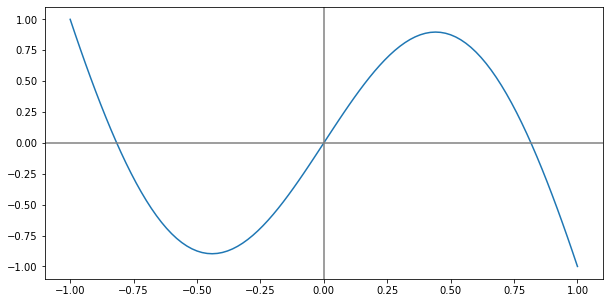

In [36]:
plt.figure( figsize = ( 10, 5 ) )
plt.plot( x, y )
plt.axhline( 0, color='gray')
plt.axvline( 0, color='gray')
plt.show()

In [2]:
x_ = np.array( [0.0, 1.0, 2.0, 3.0, 4.0, 5.0] )
y_ = np.array( [0.4, 0.7, 1.9, 2.0, 3.2, 4.5] )

In [3]:
# fig = plt.figure( figsize=( 4, 4 ) )
# plt.scatter( x_, y_ )
# plt.show()

In [4]:
# def calcula_erro( a, b ):

#     soma = 0.0
#     n = x_.shape[0]
#     for i in range(n):

#         e  = y_[i] - ( a * x_[i] + b )
#         soma += e * e

#     return soma/n

In [37]:
def calcula_erro( a, b, c, d ):

    loss = 0
    n = x.shape[0]
    for i in range(n):
      
        y_pred = a + b*x + c*(x**2) + d*(x**3)
        erro = ( y_pred - y[i] )**2
        loss += erro

    return loss

In [41]:
# a = np.arange( -2, 3, 0.1 )
# b = np.arange( -2, 3, 0.1 )
# aa, bb = np.meshgrid( a, b, sparse = True)

In [42]:
# a

In [43]:
# b

In [6]:
# err = calcula_erro( aa, bb )

In [47]:
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

print( f'a: {a}' )
print( f'b: {b}' )
print( f'c: {c}' )
print( f'd: {d}' )

a: -0.349555983778718
b: -0.7489729672104214
c: -2.6750560710119085
d: 0.16610196120437867


In [51]:
err = calcula_erro( a, b, c, d )
err

array([ 642.5385528 ,  593.88443455,  548.42544357,  506.00753595,
        466.48114893,  429.70116037,  395.52684829,  363.82185055,
        334.4541247 ,  307.29590791,  282.22367705,  259.11810889,
        237.86404043,  218.35042939,  200.47031478,  184.12077759,
        169.20290171,  155.62173483,  143.2862496 ,  132.10930481,
        122.00760681,  112.90167096,  104.71578324,   97.37796204,
         90.81992   ,   84.977026  ,   79.78826734,   75.19621195,
         71.14697082,   67.59016048,   64.47886566,   61.76960208,
         59.42227933,   57.40016389,   55.66984234,   54.20118457,
         52.96730727,   51.94453742,   51.112376  ,   50.45346176,
         49.95353518,   49.60140249,   49.38889988,   49.31085783,
         49.3650655 ,   49.55223537,   49.87596787,   50.34271626,
         50.96175156,   51.74512766,   52.70764648,   53.86682338,
         55.24285258,   56.85857277,   58.73943285,   60.91345778,
         63.41121455,   66.26577831,   69.51269858,   73.18996

In [7]:
z = np.power( err, 0.2 )
n_levels = 15

In [8]:
# h = plt.contourf( a, b, z, n_levels )
# plt.axis( 'scaled' )
# plt.colorbar()
# plt.show()

### Gradiente Descendente

In [9]:
def calcula_da( a, b ):

    soma = 0.0
    for i in range( x_.shape[0] ):

        soma += x_[i] * ( y_[i] - ( a * x_[i] + b ) )

    return -2 * soma

In [ ]:
# def calcula_da( a, b, c, d ):

#     soma = 0.0
#     for i in range( x.shape[0] ):

#         soma += x_[i] * ( y_[i] - ( a * x_[i] + b ) )

#     return -2 * soma

In [10]:
def calcula_db( a, b ):

    soma = 0.0
    for i in range( x_.shape[0] ):

        soma += y_[i] - ( a * x_[i] + b )

    return -2 * soma

In [11]:
def grad_desc( a0, b0, tol, max_it, learning_rate ):

    erro0 = calcula_erro( a0, b0 )
    erros = [erro0]
    caminho = [[ a0, b0 ]]

    for it in range( max_it ):

        da = calcula_da( a0, b0 )
        db = calcula_db( a0, b0 )
        a1 = a0 - learning_rate * da
        b1 = b0 - learning_rate * db

        erro1 = calcula_erro( a1, b1 )
        erros.append( erro1 )
        caminho.append( [a1, b1] )

        if abs(erro1 - erro0) < tol and abs(a1 - a0) < tol and abs(b1 - b0) < tol:

            print( f'Convergiu na iteração {it}' )
            print( f'Erro atual = {erro1:.3f}' )
            print( f'Delta erro = {erro1 - erro0}' )
            break
        
        a0 = a1
        b0 = b1
        erro0 = erro1


    print( f'Solução a = {a1:.3f}' )
    print( f'Solução b = {b1:.3f}' )

    return a0, b0, np.array(caminho), np.array(erros)

Convergiu na iteração 1726
Erro atual = 0.098
Delta erro = -1.792981069170807e-08
Solução a = 0.802
Solução b = 0.112


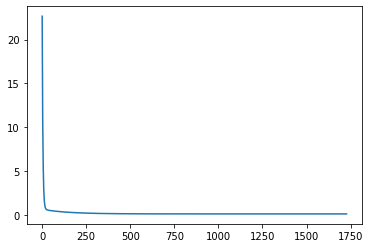

In [12]:
a0_gd, b0_gd, caminho, erros = grad_desc( -1, +1, 1e-5, 10000, 0.001 )

interacao = np.linspace( 0, erros.shape[0] - 1, erros.shape[0] )
plt.plot( interacao, erros )
plt.show()

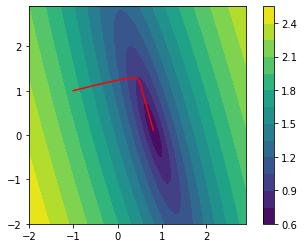

In [13]:
h = plt.contourf( a, b, z, n_levels )

plt.axis( 'scaled' )
plt.plot( caminho[:, 0], caminho[:, 1], 'r' )
plt.colorbar()
plt.show()

### Pytorch (autograd)

In [16]:
X = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
Y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)

In [17]:
n_samples, n_features = X.shape
print(f'#samples: {n_samples}, #features: {n_features}')
# 0) create a test sample
X_test = torch.tensor([5], dtype=torch.float32)

#samples: 4, #features: 1


In [18]:
input_size = n_features
output_size = n_features

In [19]:
# model = nn.Linear(input_size, output_size)

In [20]:
class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        # define diferent layers
        self.lin = nn.Linear(input_dim, output_dim)
    def forward(self, x):
        return self.lin(x)
model = LinearRegression(input_size, output_size)

In [ ]:
# class MeuModelo(nn.Module):
#     def __init__(self, input_dim, output_dim):
        
#         # super(LinearRegression, self).__init__()
#         self.forward = nn.Linear(input_dim, output_dim)
#     def forward(self, x):
#         return self.lin(x)
# model = LinearRegression(input_size, output_size)

In [21]:
print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')

Prediction before training: f(5) = -4.125


In [22]:
learning_rate = 0.01
n_iters = 100

In [23]:
loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [29]:
for epoch in range(n_iters):
    # predict = forward pass with our model
    y_predicted = model(X)

    # loss
    l = loss(Y, y_predicted)

    # calculate gradients = backward pass
    l.backward()

    # update weights
    optimizer.step()

    # zero the gradients after updating
    optimizer.zero_grad()

    if epoch % 10 == 0:
        [w, b] = model.parameters() # unpack parameters
        print('epoch ', epoch+1, ': w = ', w[0][0].item(), ' loss = ', l)

print(f'Prediction after training: f(5) = {model(X_test).item():.3f}')

epoch  1 : w =  1.7890064716339111  loss =  tensor(0.0647, grad_fn=<MseLossBackward0>)
epoch  11 : w =  1.795238971710205  loss =  tensor(0.0609, grad_fn=<MseLossBackward0>)
epoch  21 : w =  1.8012874126434326  loss =  tensor(0.0574, grad_fn=<MseLossBackward0>)
epoch  31 : w =  1.8071571588516235  loss =  tensor(0.0540, grad_fn=<MseLossBackward0>)
epoch  41 : w =  1.812853455543518  loss =  tensor(0.0509, grad_fn=<MseLossBackward0>)
epoch  51 : w =  1.8183815479278564  loss =  tensor(0.0479, grad_fn=<MseLossBackward0>)
epoch  61 : w =  1.8237463235855103  loss =  tensor(0.0451, grad_fn=<MseLossBackward0>)
epoch  71 : w =  1.8289527893066406  loss =  tensor(0.0425, grad_fn=<MseLossBackward0>)
epoch  81 : w =  1.8340051174163818  loss =  tensor(0.0400, grad_fn=<MseLossBackward0>)
epoch  91 : w =  1.8389084339141846  loss =  tensor(0.0377, grad_fn=<MseLossBackward0>)
Prediction after training: f(5) = 9.677


In [24]:
x = torch.randn(3, requires_grad=True)
y = x + 2

# y was created as a result of an operation, so it has a grad_fn attribute.
# grad_fn: references a Function that has created the Tensor
print(x) # created by the user -> grad_fn is None
print(y)
print(y.grad_fn)

# Do more operations on y
z = y * y * 3
print(z)
z = z.mean()
print(z)

# Let's compute the gradients with backpropagation
# When we finish our computation we can call .backward() and have all the gradients computed automatically.
# The gradient for this tensor will be accumulated into .grad attribute.
# It is the partial derivate of the function w.r.t. the tensor

z.backward()
print(x.grad) # dz/dx

# Generally speaking, torch.autograd is an engine for computing vector-Jacobian product
# It computes partial derivates while applying the chain rule

# -------------
# Model with non-scalar output:
# If a Tensor is non-scalar (more than 1 elements), we need to specify arguments for backward() 
# specify a gradient argument that is a tensor of matching shape.
# needed for vector-Jacobian product

x = torch.randn(3, requires_grad=True)

y = x * 2
for _ in range(10):
    y = y * 2

print(y)
print(y.shape)

v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float32)
y.backward(v)
print(x.grad)

# -------------
# Stop a tensor from tracking history:
# For example during our training loop when we want to update our weights
# then this update operation should not be part of the gradient computation
# - x.requires_grad_(False)
# - x.detach()
# - wrap in 'with torch.no_grad():'

# .requires_grad_(...) changes an existing flag in-place.
a = torch.randn(2, 2)
print(a.requires_grad)
b = ((a * 3) / (a - 1))
print(b.grad_fn)
a.requires_grad_(True)
print(a.requires_grad)
b = (a * a).sum()
print(b.grad_fn)

# .detach(): get a new Tensor with the same content but no gradient computation:
a = torch.randn(2, 2, requires_grad=True)
print(a.requires_grad)
b = a.detach()
print(b.requires_grad)

# wrap in 'with torch.no_grad():'
a = torch.randn(2, 2, requires_grad=True)
print(a.requires_grad)
with torch.no_grad():
    print((x ** 2).requires_grad)

# -------------
# backward() accumulates the gradient for this tensor into .grad attribute.
# !!! We need to be careful during optimization !!!
# Use .zero_() to empty the gradients before a new optimization step!
weights = torch.ones(4, requires_grad=True)

for epoch in range(3):
    # just a dummy example
    model_output = (weights*3).sum()
    model_output.backward()
    
    print(weights.grad)

    # optimize model, i.e. adjust weights...
    with torch.no_grad():
        weights -= 0.1 * weights.grad

    # this is important! It affects the final weights & output
    weights.grad.zero_()

print(weights)
print(model_output)

# Optimizer has zero_grad() method
# optimizer = torch.optim.SGD([weights], lr=0.1)
# During training:
# optimizer.step()
# optimizer.zero_grad()